# Overview
The goal of this project is to predict the price stability of electricity prices based on the distribution of fuel sources in the area. This notebook gathers historic price data (monthly average electricity prices by state) from the US Energy Information Agency (EIA) and calculates the coefficient of variation for each state and year. We define the price stability as the coefficient of variation because this measurement allows us to compare the volatility without the noise of price magnitude.

$$ \text{Coefficient of Variation} = \frac{\text{Standard Deviation}}{\text{Mean}}$$

In other notebooks, we will explore:
- How the distribution of fuel sources has changed over time for each state
- The appropriate level of aggregation for this model
- The role the futures contract market plays in predicting price movement of electricity


# Imports

In [47]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Setup

In [48]:
api_key = "434497acc44b2c7be286bb8f9467ee3b"

Thanks to this GitHub post ([Source](https://gist.github.com/JeffPaine/3083347))

In [49]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

Reference for reading in EIA data through their API ([Source](https://medium.com/analytics-vidhya/use-python-to-pull-energy-data-from-the-us-department-of-energys-api-11d6f724927e))

In [50]:
%%time 
monthly_prices = None
time_frame = {"monthly":"M", "quarterly":"Q", "annualy":"A"}

for state in states:
    print(f"({states.index(state)+1} of {len(states)})\t{state}\t...\t", end="")

    series_id = f"ELEC.PRICE.{state}-ALL.{time_frame['monthly']}"

    url = f"http://api.eia.gov/series/?api_key={api_key}&series_id={series_id}"
    r = requests.get(url)
    json_data = r.json()

    if monthly_prices is None:
        monthly_prices = pd.DataFrame(json_data.get('series')[0].get('data'),
                          columns = ['Date', state])
    else:
        temp = pd.DataFrame(json_data.get('series')[0].get('data'),
                          columns = ['Date', state])
        monthly_prices = monthly_prices.merge(temp, on="Date", how="outer")

    print("Done")

(1 of 51)	AL	...	Done
(2 of 51)	AK	...	Done
(3 of 51)	AZ	...	Done
(4 of 51)	AR	...	Done
(5 of 51)	CA	...	Done
(6 of 51)	CO	...	Done
(7 of 51)	CT	...	Done
(8 of 51)	DC	...	Done
(9 of 51)	DE	...	Done
(10 of 51)	FL	...	Done
(11 of 51)	GA	...	Done
(12 of 51)	HI	...	Done
(13 of 51)	ID	...	Done
(14 of 51)	IL	...	Done
(15 of 51)	IN	...	Done
(16 of 51)	IA	...	Done
(17 of 51)	KS	...	Done
(18 of 51)	KY	...	Done
(19 of 51)	LA	...	Done
(20 of 51)	ME	...	Done
(21 of 51)	MD	...	Done
(22 of 51)	MA	...	Done
(23 of 51)	MI	...	Done
(24 of 51)	MN	...	Done
(25 of 51)	MS	...	Done
(26 of 51)	MO	...	Done
(27 of 51)	MT	...	Done
(28 of 51)	NE	...	Done
(29 of 51)	NV	...	Done
(30 of 51)	NH	...	Done
(31 of 51)	NJ	...	Done
(32 of 51)	NM	...	Done
(33 of 51)	NY	...	Done
(34 of 51)	NC	...	Done
(35 of 51)	ND	...	Done
(36 of 51)	OH	...	Done
(37 of 51)	OK	...	Done
(38 of 51)	OR	...	Done
(39 of 51)	PA	...	Done
(40 of 51)	RI	...	Done
(41 of 51)	SC	...	Done
(42 of 51)	SD	...	Done
(43 of 51)	TN	...	Done
(44 of 51)	TX	...	Do

In [51]:
def format_date(x):
    x = str(x)
    try:
        year = int(x[:4])
        month = int(x[4:])
        d = datetime.date(year=year, month=month, day=1)
    except:
        d = datetime.datetime.strptime(x, '%b %Y')
    
    return d.strftime('%b %Y')

monthly_prices["Date"] = monthly_prices["Date"].apply(format_date)
monthly_prices = monthly_prices.set_index("Date")
monthly_prices = monthly_prices.iloc[::-1]

This data was pulled from the EIA API. It represents the monthly average retail price of electricity (aggregated for all sectors). The data goes back to Jan 2001. ([Source](https://www.eia.gov/opendata/qb.php?category=40))

In [52]:
monthly_prices.head()

,AL,AK,AZ,AR,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,IA,KS,KY,LA,ME,MD,MA,MI,MN,MS,MO,MT,NE,NV,NH,NJ,NM,NY,NC,ND,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan 2001,5.54,9.97,6.35,5.69,8.71,5.55,9.76,6.35,6.11,7.43,5.90,14.56,4.43,5.87,5.05,5.72,5.80,4.13,7.37,11.15,5.93,10.90,7.02,5.54,5.93,5.26,5.35,4.77,6.44,11.77,9.05,6.91,11.53,6.38,5.03,6.28,5.98,5.03,7.68,11.27,6.02,5.85,5.59,6.90,4.67,10.95,5.86,4.79,4.98,5.90,4.31
Feb 2001,5.31,9.92,6.48,5.60,9.63,5.79,9.06,6.53,5.38,7.48,6.20,14.42,4.50,6.17,5.08,5.80,5.93,4.25,7.92,11.05,6.07,10.93,6.91,5.83,5.84,5.35,7.16,4.95,6.42,11.31,8.77,6.99,11.17,6.56,5.28,6.36,5.83,5.02,7.46,11.34,5.76,6.10,5.51,6.91,5.26,11.12,6.03,5.11,4.99,5.98,4.36
Mar 2001,5.87,10.91,6.57,5.73,9.89,5.66,9.38,6.33,6.31,7.51,6.10,14.23,4.39,6.47,5.23,5.82,6.12,4.03,8.47,10.78,5.92,11.15,6.98,5.69,5.93,5.47,6.64,5.08,7.46,11.53,8.97,6.91,11.01,6.44,5.22,6.29,6.27,5.15,7.75,11.71,5.65,6.11,5.48,7.02,4.92,10.84,6.06,5.37,5.15,5.93,4.34
Apr 2001,5.72,10.59,6.87,6.04,9.88,5.91,9.61,6.27,6.31,7.87,6.19,13.91,4.38,6.61,5.14,6.02,6.02,4.01,7.75,9.41,6.19,11.52,6.73,5.70,6.15,5.43,7.15,4.97,7.61,11.75,9.18,7.06,10.70,6.38,5.34,6.47,5.97,5.27,7.87,12.69,5.59,6.23,5.51,7.04,5.39,10.42,6.05,5.40,5.00,6.02,4.26
May 2001,5.60,10.55,7.86,6.16,9.82,6.20,9.57,7.54,6.74,7.87,6.23,13.88,5.12,6.88,5.27,6.33,6.22,4.22,7.29,9.21,6.71,11.45,6.81,5.96,6.44,6.22,7.34,5.21,7.75,10.39,9.22,7.35,10.97,6.36,5.58,6.90,6.39,5.15,8.00,11.72,5.45,6.49,5.55,7.34,5.42,10.56,6.17,5.22,5.04,5.98,4.40


In [53]:
# states_of_interest = ["CA", "TX", "AL", "WY", "NH", "HI"]
states_of_interest = ["CA", "TX", "HI"]

count    247.000000
mean       9.752643
std        1.486163
min        6.888431
25%        8.547059
50%       10.224314
75%       10.970784
max       12.070588
dtype: float64

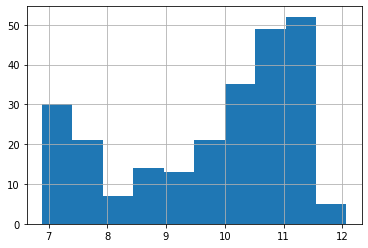

In [54]:
monthly_prices.mean(axis=1).hist();
monthly_prices.mean(axis=1).describe()

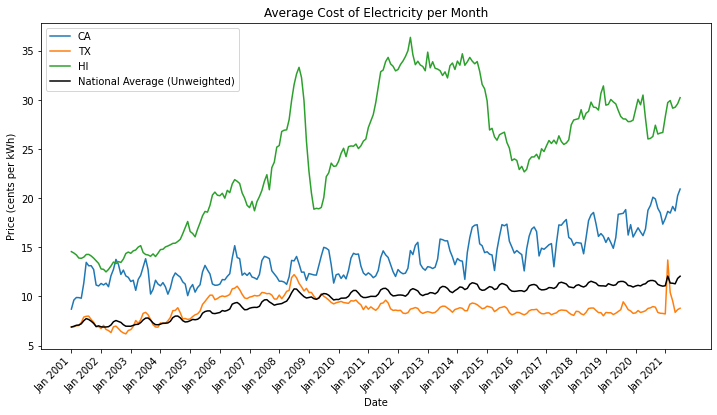

In [55]:
plt.figure(figsize=(12,6))

# monthly_prices[states_of_interest].plot(figsize=(12,8))

for s in states_of_interest:
    plt.plot(monthly_prices.index, monthly_prices[s], label=s)

plt.plot(monthly_prices.index, monthly_prices.mean(axis=1), label="National Average (Unweighted)", color="black")

plt.title("Average Cost of Electricity per Month")
plt.xticks([x for x in monthly_prices.index if "Jan" in x], rotation=45, ha="right")
plt.ylabel("Price (cents per kWh)")
plt.xlabel("Date")
plt.legend()
plt.show()

# Exploring Texas Energy Price History


In [56]:
# display(monthly_prices.TX.describe())

# monthly_prices[["TX"]].plot()

# plt.title("Texas")
# plt.ylabel("Price (cents per kWh)")
# plt.show()

In [57]:
# monthly_prices.TX.head()

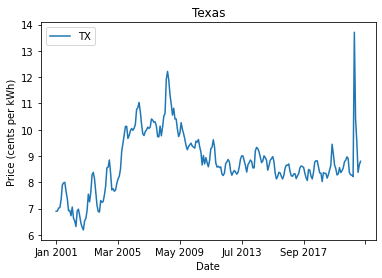

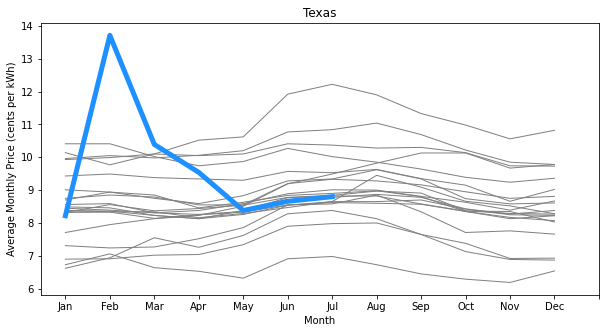

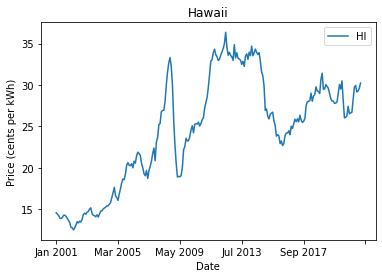

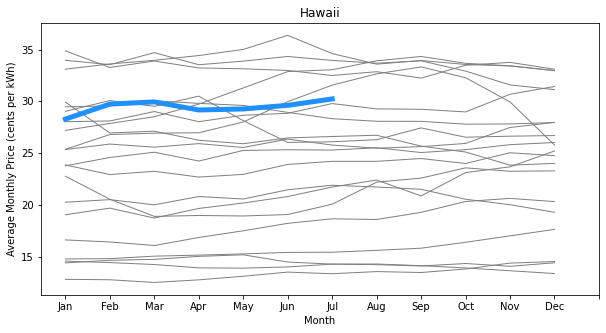

In [58]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

states_dict = {"Texas": "TX",
          "Hawaii": "HI"} 
year_of_interest = [2021]

for state in states_dict.keys():
    monthly_prices[[states_dict[state]]].plot()

    plt.title(state)
    plt.ylabel("Price (cents per kWh)")
    plt.show()

    plt.figure(figsize=(10,5))
    for year in range(2001, 2022):
        color = "dodgerblue" if year in year_of_interest else "grey" # Highlight curent year
        width = 5 if year in year_of_interest else 1 # Highlight curent year
        
        temp = monthly_prices[monthly_prices.index.str.contains(str(year))][states_dict[state]]
        temp = temp.reset_index()

        plt.plot(temp.index, temp[states_dict[state]], label=year, color=color, linewidth=width)
        

    plt.xticks(range(13), months)
    plt.title(state)
    # plt.legend()
    plt.xlabel("Month")
    plt.ylabel("Average Monthly Price (cents per kWh)")
    plt.show()

    print("{:=^75}".format(""))

# Coefficient of Variation (Target Variable)

Using the Coefficient of Variation to compare the volatility of each states price action. 
<br>
`Coefficient of Variation = Standard Deviation / Average`
<br>
([Source](https://seekingalpha.com/article/4079870-coefficient-of-variation-better-metric-to-compare-volatility))

## Next
- [x] Color Code by Region
    - [ ] Electricity Market Module Regions ([Source](https://www.eia.gov/outlooks/aeo/pdf/nerc_map.pdf))
    - [x] North American Electric Reliability Corporation - NERC ([Source](https://www.nerc.com/AboutNERC/keyplayers/Pages/default.aspx))
        - https://en.wikipedia.org/wiki/North_American_power_transmission_grid
    

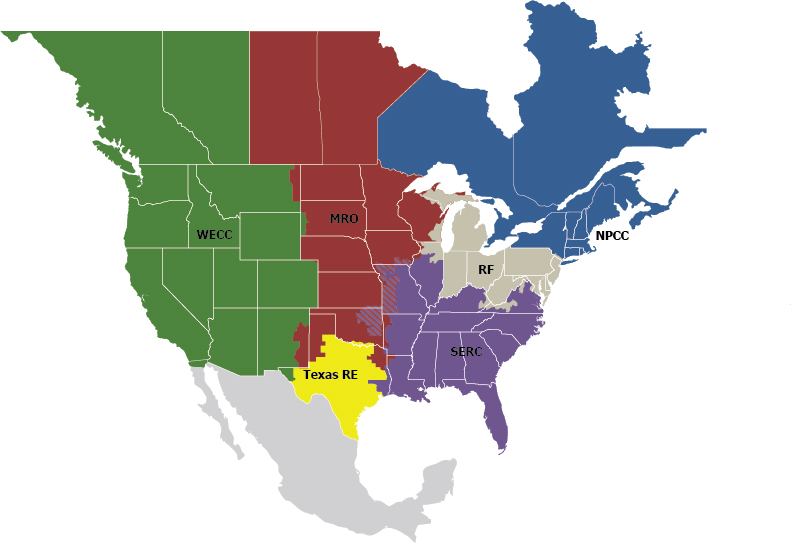

In [59]:
WECC = ["WA", "OR", "CA", "ID", 
        "NV", "AZ", "MT", "WY", 
        "UT", "CO", "NM"]
MRO = ["ND", "SD", "NE", "KS", 
       "OK", "IA", "MN", "WI"]
RF = ["MI", "IN", "OH", "PA",
      "WV", "MD", "DE", "NJ",
      "DC"]
SERC = ["MO", "AR", "LA", "IL",
        "KY", "VA", "TN", "NC", 
        "SC", "GA", "AL", "MS", "FL"]
NPCC = ["NY", "CT", "RI", "MA",
        "VT", "NH", "ME"]
TEXAS = ["TX"]
ALASKA = ["AK"]
HAWAII = ["HI"]

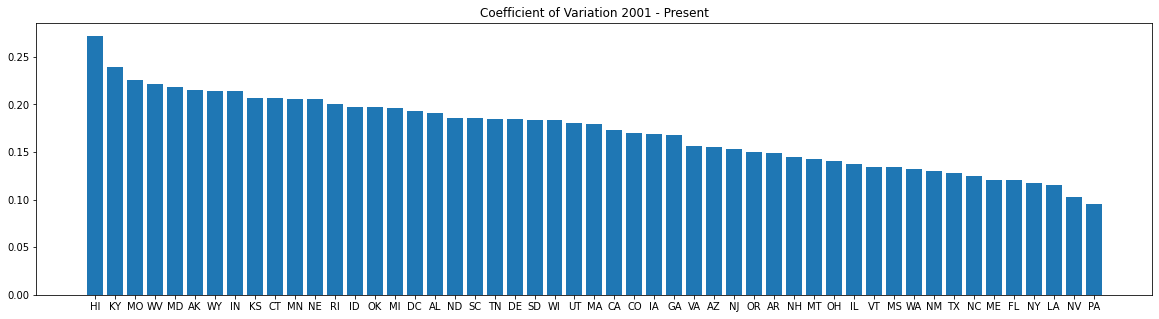

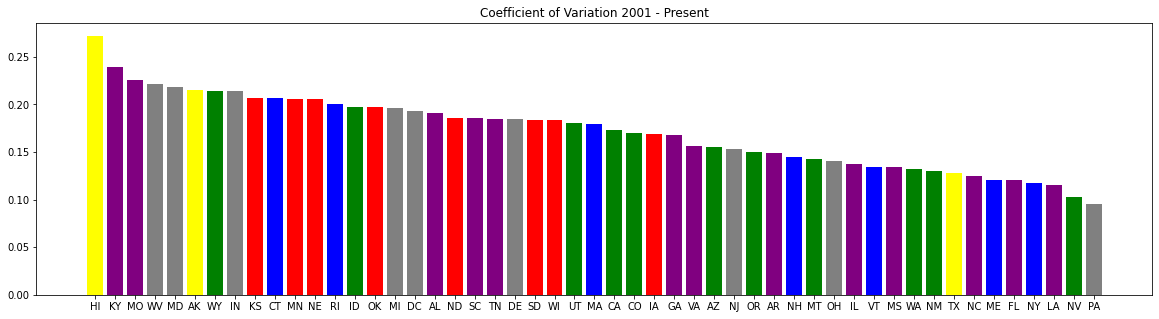

In [60]:
COV_df = monthly_prices.std() / monthly_prices.mean()
COV_df = pd.DataFrame(COV_df, columns=["COV"])

COV_df = COV_df.sort_values("COV", ascending=False)

colors = []

# This color scheme mathes the NERC grid map
for c in COV_df.index:
    if c in WECC:
        colors.append("green")
    elif c in MRO:
        colors.append("red")
    elif c in SERC:
        colors.append("purple")
    elif c in NPCC:
        colors.append("blue")
    elif c in RF:
        colors.append("grey")
    elif c in TEXAS:
        colors.append("yellow")
    elif c in ALASKA:
        colors.append("yellow")
    elif c in HAWAII:
        colors.append("yellow")
    else:
        colors.append("magenta")

plt.figure(figsize=(20,5))
plt.bar(COV_df.index, COV_df.COV)
plt.title(f"Coefficient of Variation 2001 - Present")
plt.show()

plt.figure(figsize=(20,5))
plt.bar(COV_df.index, COV_df.COV, color=colors)
plt.title(f"Coefficient of Variation 2001 - Present")
plt.show()

# Sanity Check

In [61]:
for state in states:
    # print(COV_df.loc[state]["COV"], end="\t")
    # print(monthly_prices[state].std() / monthly_prices[state].mean())
    
    if COV_df.loc[state]["COV"] != monthly_prices[state].std() / monthly_prices[state].mean():
        print(f"Error with {state}")

## A less confusing version of the graph above.

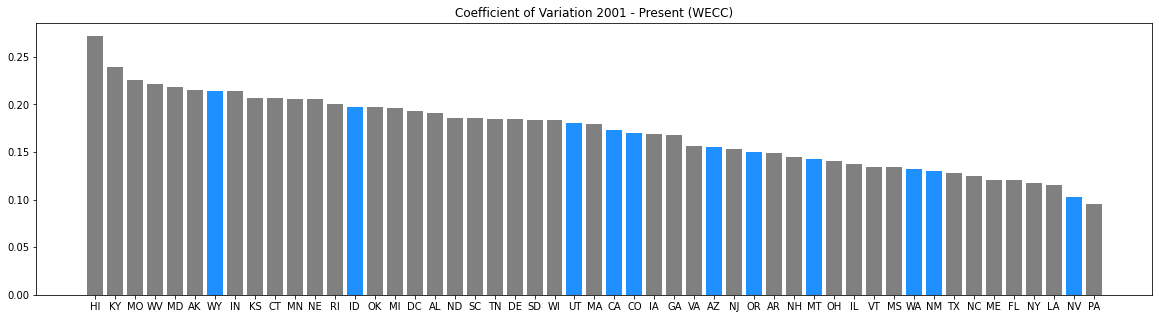

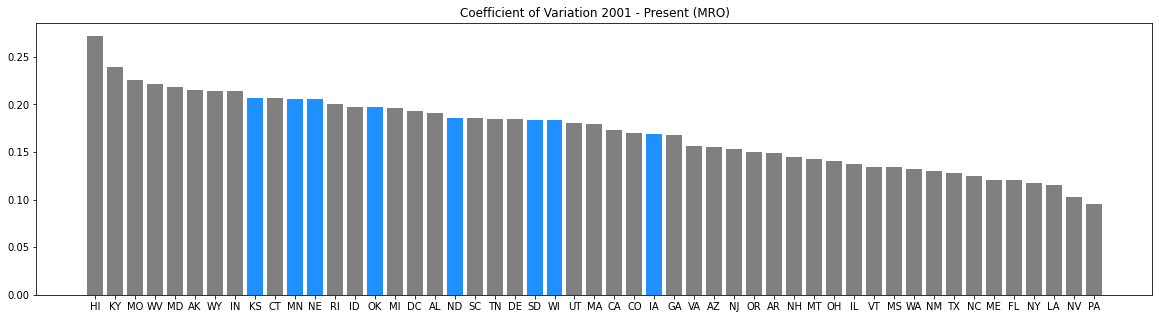

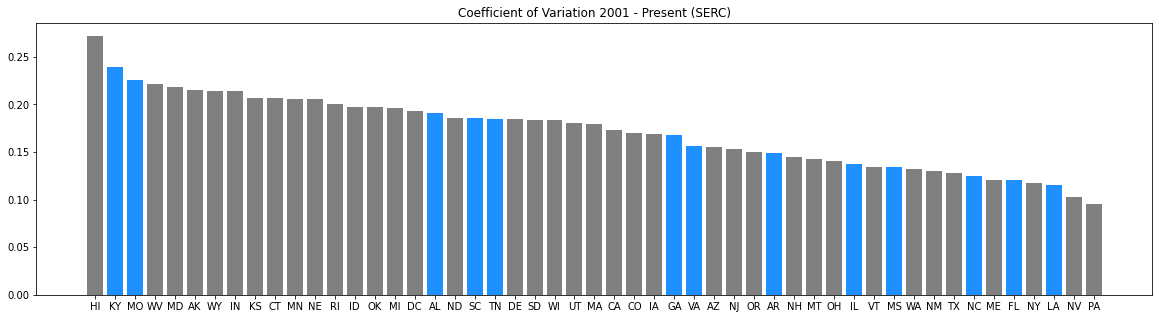

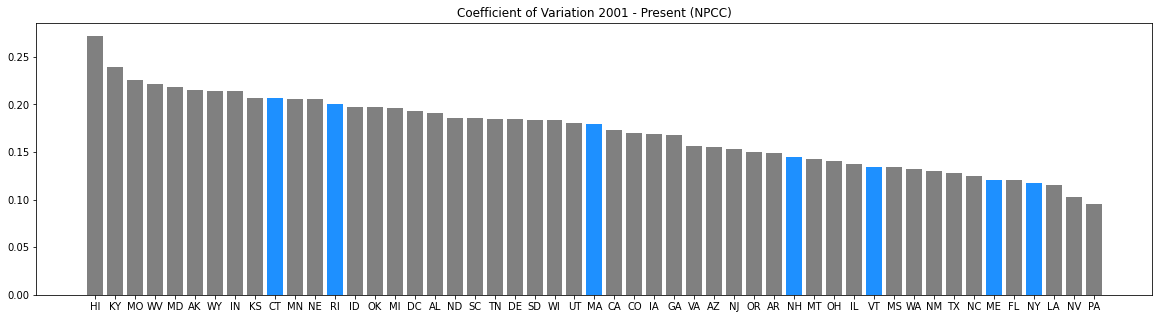

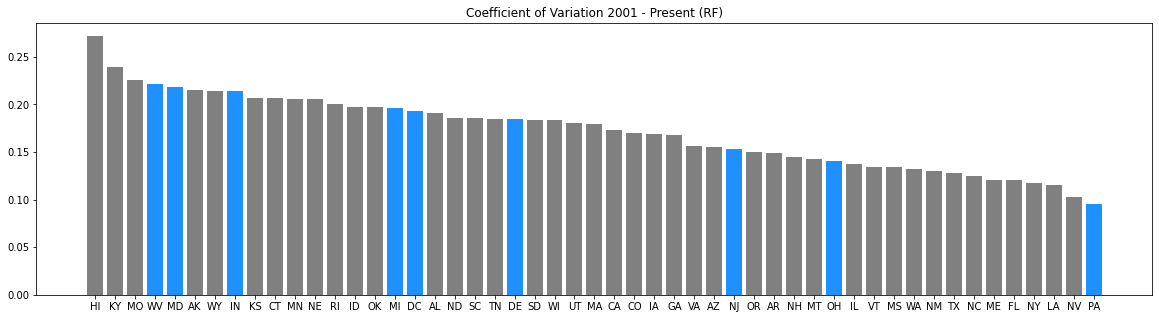

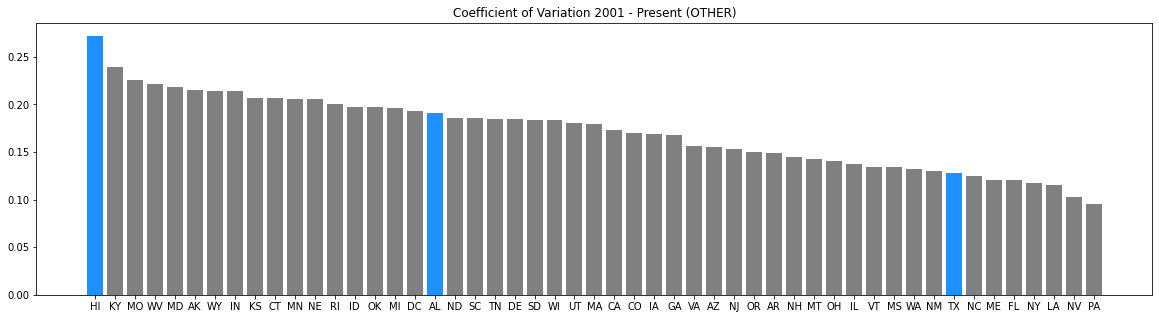

In [62]:
codes = {"WECC":WECC,
         "MRO":MRO,
         "SERC":SERC,
         "NPCC":NPCC,
         "RF":RF,
         "OTHER":["TX", "HI", "AL"]}

for code in codes.keys():
    colors = []  
    for c in COV_df.index:
        if c in codes[code]:
            colors.append("dodgerblue")
        else:
            colors.append("grey")

    plt.figure(figsize=(20,5))
    plt.bar(COV_df.index, COV_df.COV, color=colors)
    plt.title(f"Coefficient of Variation 2001 - Present ({code})")
    plt.show()

# For the Slides

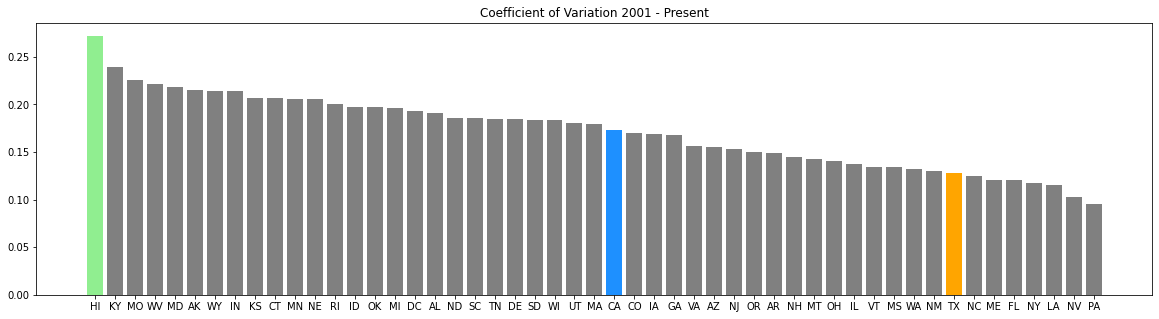

In [69]:
colors = []  
for c in COV_df.index:
    if c == "CA":
        colors.append("dodgerblue")
    elif c == "TX":
        colors.append("orange")
    elif c == "HI":
        colors.append("lightgreen")
    else:
        colors.append("grey")

plt.figure(figsize=(20,5))
plt.bar(COV_df.index, COV_df.COV, color=colors)
plt.title(f"Coefficient of Variation 2001 - Present")
plt.show()

**Columns**: Coefficient of Variation for each year
<br>
**Rows**: States
<br>
**Rational**: If our features will be percent relevance of each power source per state, per year, then our target variable should also be measured per state per year. Final matrix of features with be 1071 rows ((51, 21)), and as many columns as there are fuel sources.

In [ ]:
temp = monthly_prices.std() / monthly_prices.mean()
temp = pd.DataFrame(temp, columns=["COV"])

# monthly_prices[monthly_prices.index.str.contains("Jan")]
yearly_COV_df = None

for year in range(2001, 2022):
    df = monthly_prices[monthly_prices.index.str.contains(str(year))]
    df = df.std() / df.mean()
    df = pd.DataFrame(df, columns=[f"COV_{year}"])

    if yearly_COV_df is None:
        yearly_COV_df = df
    else:
        yearly_COV_df = yearly_COV_df.merge(df, left_index=True, right_index=True)

In [ ]:
print(yearly_COV_df.shape)
yearly_COV_df.head()

(51, 21)


,COV_2001,COV_2002,COV_2003,COV_2004,COV_2005,COV_2006,COV_2007,COV_2008,COV_2009,COV_2010,COV_2011,COV_2012,COV_2013,COV_2014,COV_2015,COV_2016,COV_2017,COV_2018,COV_2019,COV_2020,COV_2021
AL,0.030268,0.041504,0.051440,0.044840,0.079970,0.089906,0.053198,0.106234,0.051428,0.044282,0.053335,0.049280,0.050040,0.041557,0.049000,0.042463,0.029990,0.025065,0.047335,0.045278,0.025961
AK,0.035090,0.023952,0.027478,0.022040,0.037480,0.038506,0.040397,0.039052,0.021611,0.019699,0.023172,0.033813,0.028632,0.049526,0.025910,0.025926,0.023668,0.022294,0.018089,0.024971,0.030464
AZ,0.097578,0.091424,0.086677,0.072961,0.079411,0.091912,0.083463,0.083998,0.081023,0.092773,0.085794,0.083662,0.075330,0.075649,0.084857,0.079855,0.072571,0.065248,0.055664,0.073586,0.065033
AR,0.067610,0.065392,0.080882,0.077152,0.090301,0.079138,0.051092,0.080515,0.034783,0.038997,0.073857,0.054409,0.043574,0.055010,0.056101,0.051836,0.050296,0.049843,0.035661,0.044402,0.225276
CA,0.145412,0.071167,0.088752,0.063988,0.074387,0.094344,0.070675,0.081115,0.095680,0.078297,0.074951,0.086021,0.087441,0.113782,0.095763,0.086930,0.086311,0.078290,0.083127,0.077999,0.041955


In [ ]:
yearly_COV_df_reshaped = pd.DataFrame(columns=["state", "year", "COV"])

for index, row in yearly_COV_df.iterrows():
    for col in yearly_COV_df.columns:
        temp = {"state" : index, 
                "year" : int(col.split("_")[1]), 
                "COV" : row[col]}
        yearly_COV_df_reshaped = yearly_COV_df_reshaped.append(temp, ignore_index=True)

## Target Matrix
This will match the **feature matrix** on state and year.

In [ ]:
print(f"Length:\t{len(yearly_COV_df_reshaped)} rows")
yearly_COV_df_reshaped.head(5)

Length:	1071 rows


,state,year,COV
0,AL,2001,0.030268
1,AL,2002,0.041504
2,AL,2003,0.051440
3,AL,2004,0.044840
4,AL,2005,0.079970


In [ ]:
# yearly_COV_df_reshaped.COV.hist()